In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [3]:
#Import & open the excel file
file_path = r"C:\\Users\\Hp\\Documents\\project\\Projects\\DataSets\\Capstone dataset\\cust_data.xlsx"
df = pd.read_excel(file_path)

In [4]:
df.head(25)
zero_counts = (df == 0).sum()

print(zero_counts)

Cust_ID                       0
Gender                        0
Orders                     7294
Jordan                    25188
Gatorade                  25050
Samsung                   26900
Asus                      27597
Udis                      27588
Mondelez International    26917
Wrangler                  28164
Vans                      27985
Fila                      28410
Brooks                    26700
H&M                       23756
Dairy Queen               26803
Fendi                     26931
Hewlett Packard           27033
Pladis                    28051
Asics                     25586
Siemens                   29077
J.M. Smucker              16480
Pop Chips                 24960
Juniper                   22031
Huawei                    25666
Compaq                    27653
IBM                       29384
Burberry                  23120
Mi                        27540
LG                        28062
Dior                      24591
Scabal                    22215
Tommy Hi

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
Orders,30000.0,4.169800,3.590311,0.0,1.00,4.0,7.00,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.00,0.0,0.00,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.00,0.0,0.00,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.00,0.0,0.00,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.00,0.0,0.00,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.00,0.0,0.00,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.00,0.0,0.00,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.00,0.0,0.00,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.00,0.0,0.00,16.0


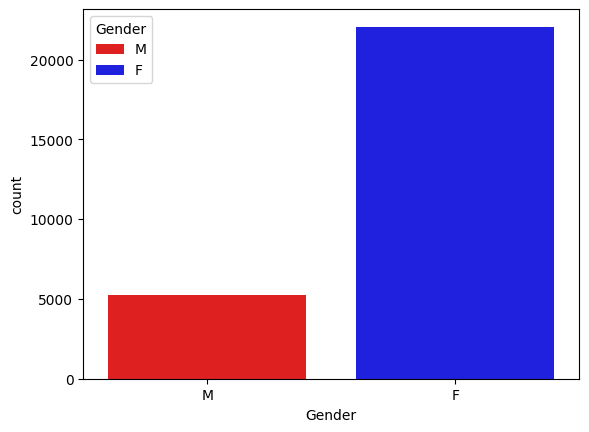

Gender
F    22054
M     5222
Name: count, dtype: int64

In [7]:
# Plot to check the count of male and female customers
sns.countplot(df, x='Gender', palette={'M': 'red', 'F': 'blue'},hue='Gender')
plt.show()
df['Gender'].value_counts()